# HR_Analytics

**Importing Libraries**

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [260]:
# Read the data of ScaleneWorks
# Here file is CSV i.e Comma Seperated Values
#df is a variable
df = pd.read_csv('B:\work\HR_data.csv')

In [261]:
df.head()

SLNO  Candidate.Ref DOJ.Extended  Duration.to.accept.offer  Notice.period  \
0     1        2110407          Yes                        14             30   
1     2        2112635           No                        18             30   
2     3        2112838           No                         3             45   
3     4        2115021           No                        26             30   
4     5        2115125          Yes                         1            120   

  Offered.band  Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0           E2                       -20.79                        13.16   
1           E2                        50.00                       320.00   
2           E2                        42.84                        42.84   
3           E2                        42.84                        42.84   
4           E2                        42.59                        42.59   

   Percent.difference.CTC Joining.Bonus Candidate.relocate.actual  Gender  \
0                   42.86            No                        No  Female   
1                  180.00            No                        No    Male   
2                    0.00            No                        No    Male   
3                    0.00            No                        No    Male   
4                    0.00            No                       Yes    Male   

    Candidate.Source  Rex.in.Yrs    LOB Location  Age  Status  
0             Agency           7    ERS    Noida   34  Joined  
1  Employee Referral           8  INFRA  Chennai   34  Joined  
2             Agency           4  INFRA    Noida   27  Joined  
3  Employee Referral           4  INFRA    Noida   34  Joined  
4  Employee Referral           6  INFRA    Noida   34  Joined

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
SLNO                           8995 non-null int64
Candidate.Ref                  8995 non-null int64
DOJ.Extended                   8995 non-null object
Duration.to.accept.offer       8995 non-null int64
Notice.period                  8995 non-null int64
Offered.band                   8995 non-null object
Pecent.hike.expected.in.CTC    8995 non-null float64
Percent.hike.offered.in.CTC    8995 non-null float64
Percent.difference.CTC         8995 non-null float64
Joining.Bonus                  8995 non-null object
Candidate.relocate.actual      8995 non-null object
Gender                         8995 non-null object
Candidate.Source               8995 non-null object
Rex.in.Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status      

In [263]:
df.shape

(8995, 18)

# Data Exploration

In [265]:
df.head(1)

SLNO  Candidate.Ref DOJ.Extended  Duration.to.accept.offer  Notice.period  \
0     1        2110407          Yes                        14             30   

  Offered.band  Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0           E2                       -20.79                        13.16   

   Percent.difference.CTC Joining.Bonus Candidate.relocate.actual  Gender  \
0                   42.86            No                        No  Female   

  Candidate.Source  Rex.in.Yrs  LOB Location  Age  Status  
0           Agency           7  ERS    Noida   34  Joined

**From above dataframe we observed that SLNO and Candidate.Ref are unique numbers , so u can drop  these two columns**

In [266]:
df.drop(columns= ['SLNO','Candidate.Ref'], inplace = True)

In [267]:
df.dtypes

DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [268]:
numerics = ['int64','float64']
df_numerics = df.select_dtypes(include = numerics)

In [269]:
df_numerics.tail()

Duration.to.accept.offer  Notice.period  Pecent.hike.expected.in.CTC  \
8990                         4              0                       191.67   
8991                         2              0                       150.00   
8992                         0              0                        35.42   
8993                         0             30                        76.92   
8994                         2              0                        45.25   

      Percent.hike.offered.in.CTC  Percent.difference.CTC  Rex.in.Yrs  Age  
8990                       191.67                    0.00           1   34  
8991                       150.00                    0.00           3   34  
8992                        35.42                    0.00           5   34  
8993                        53.85                  -13.04           4   34  
8994                        14.09                  -21.45           1   34

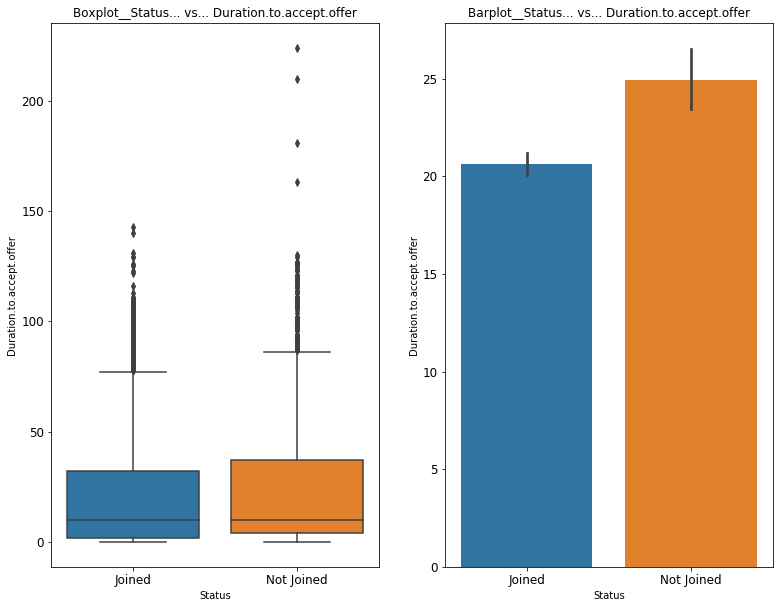

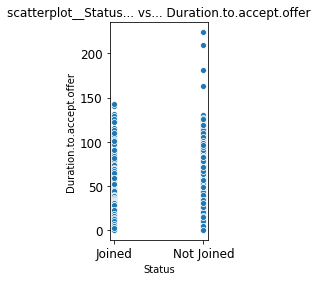

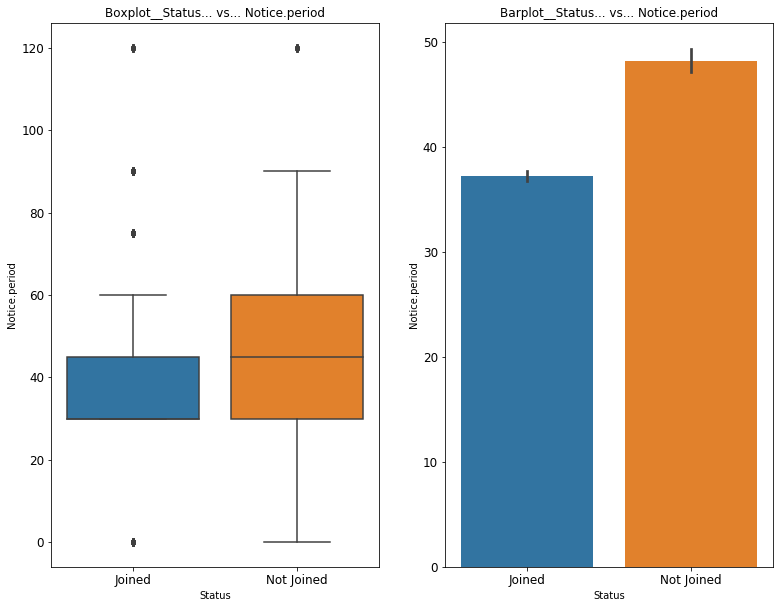

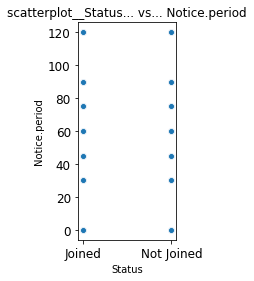

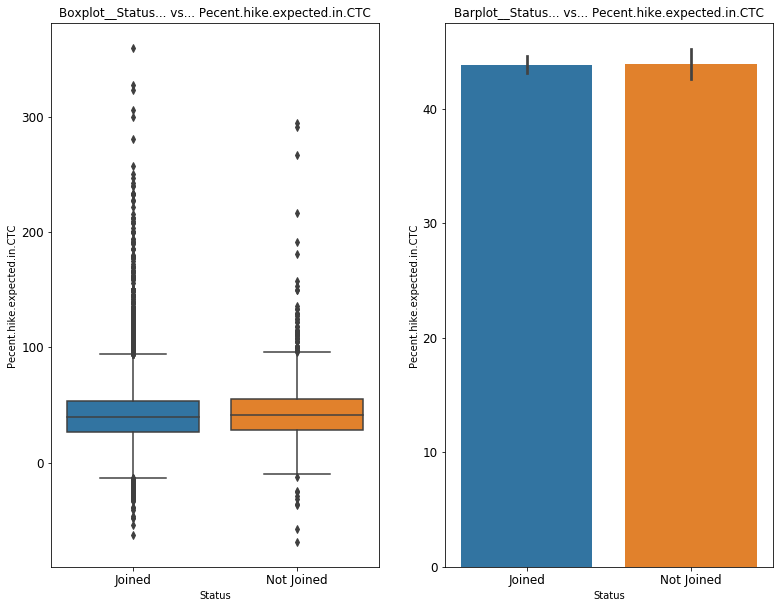

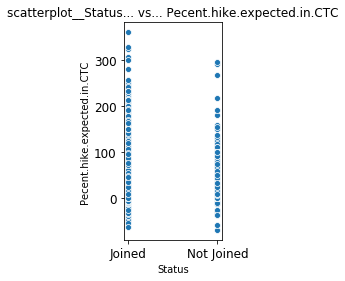

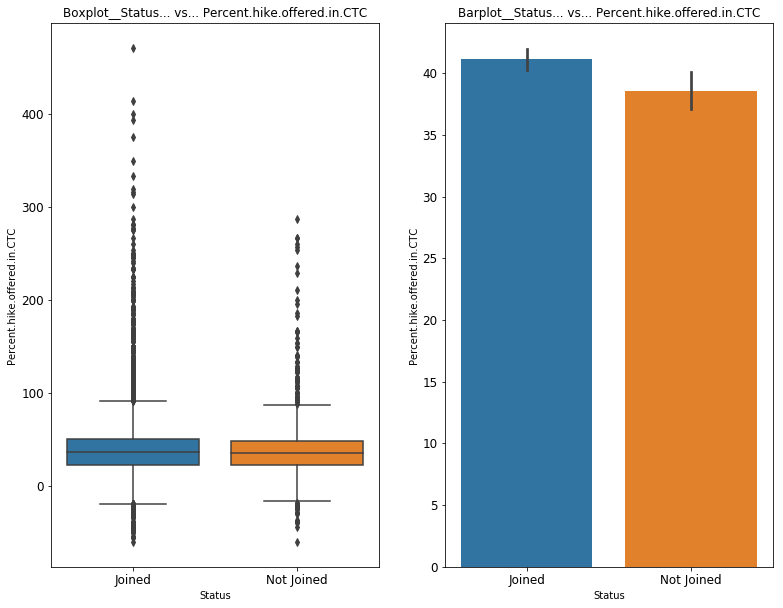

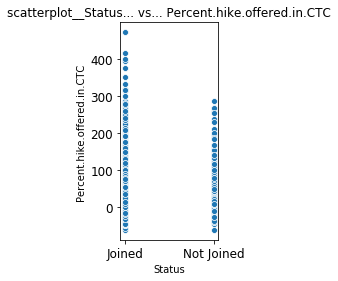

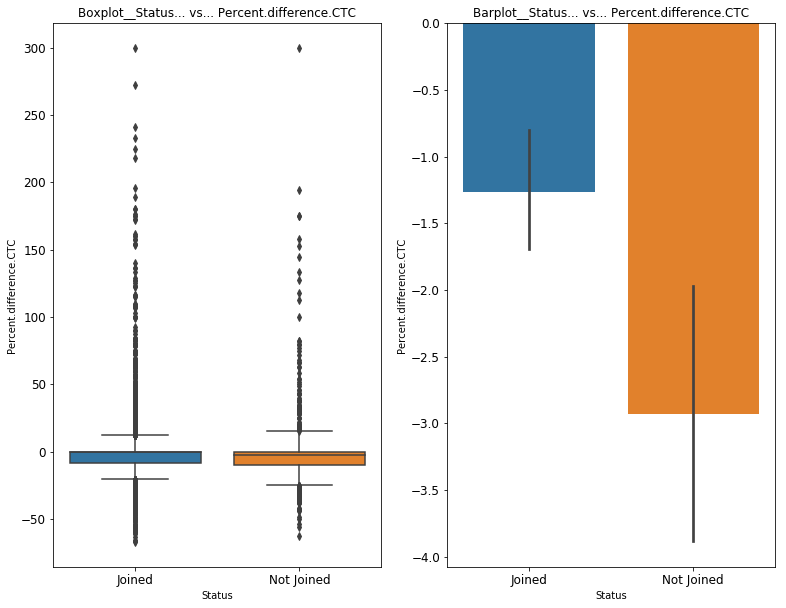

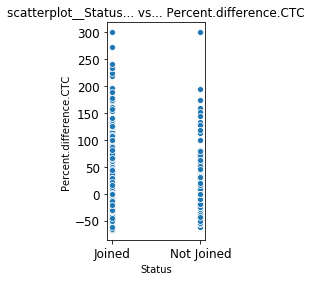

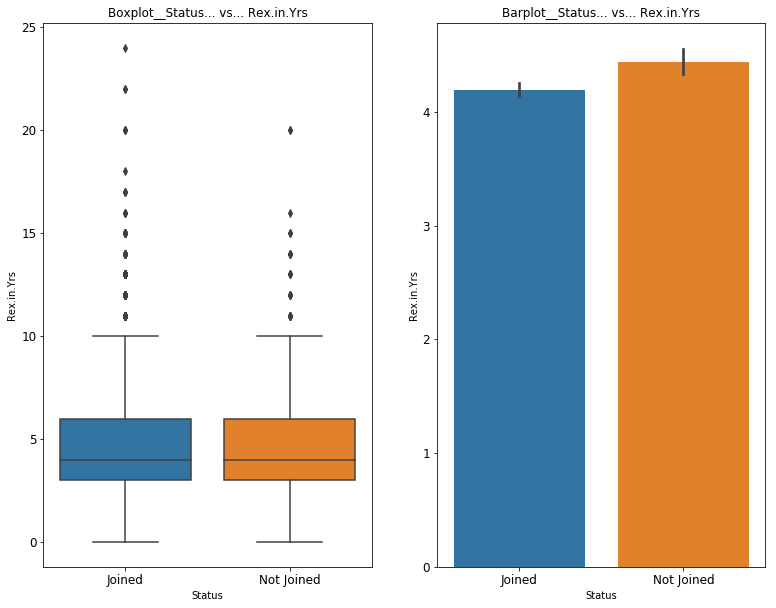

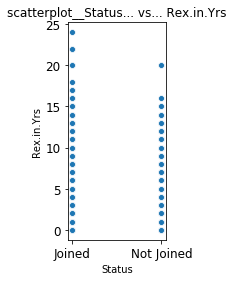

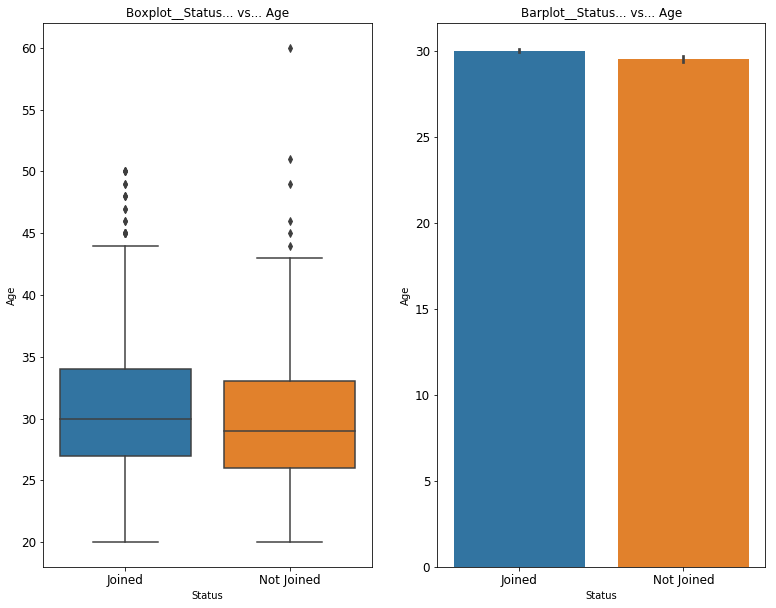

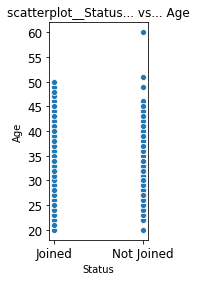

In [270]:
for column in df_numerics:
    #######----BOXPLOT------#######
  plt.figure(figsize=(20,10))
  plt.subplot(1,3,1)
  plt.title(f'Boxplot__Status... vs... {column}')
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  sns.boxplot('Status', column, data=df)
      
    
    #######----BARPLOT------#######
  plt.subplot(1,3,2)
  plt.title(f'Barplot__Status... vs... {column}')
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  sns.barplot('Status', column, data=df)
  plt.show()
    
    #######----ScatterPLOT------#######
  plt.subplot(1,3,3)
  plt.title(f'scatterplot__Status... vs... {column}')
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  sns.scatterplot('Status', column, data=df)
  plt.show() 
    
  

### For Categorical Data Visualization

In [271]:
category = ['object']
df_category = df.select_dtypes(include = category)

In [272]:
df_category.tail()

DOJ.Extended Offered.band Joining.Bonus Candidate.relocate.actual  \
8990           No           E1            No                        No   
8991          Yes           E1            No                        No   
8992           No           E2            No                        No   
8993           No           E1            No                        No   
8994           No           E1            No                        No   

      Gender   Candidate.Source    LOB Location  Status  
8990    Male  Employee Referral    ERS  Chennai  Joined  
8991  Female             Direct   BFSI  Chennai  Joined  
8992    Male             Direct  INFRA    Noida  Joined  
8993    Male             Direct  INFRA    Noida  Joined  
8994  Female  Employee Referral  INFRA  Chennai  Joined

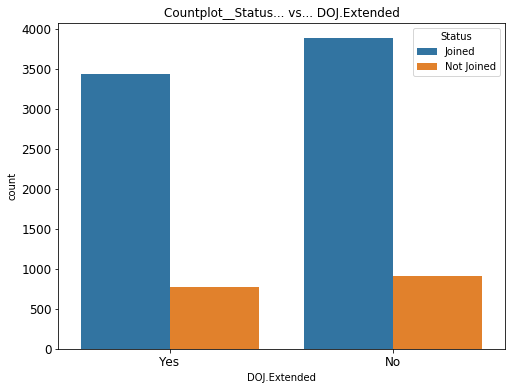

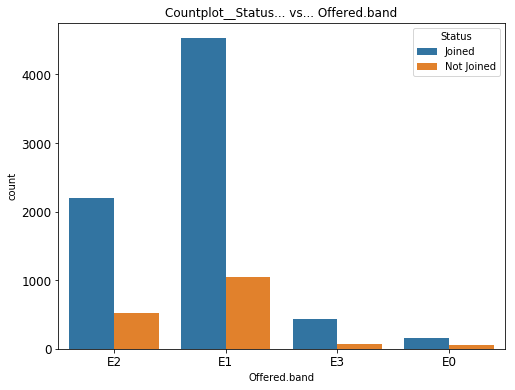

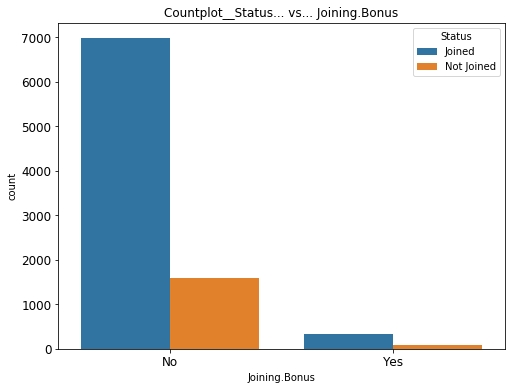

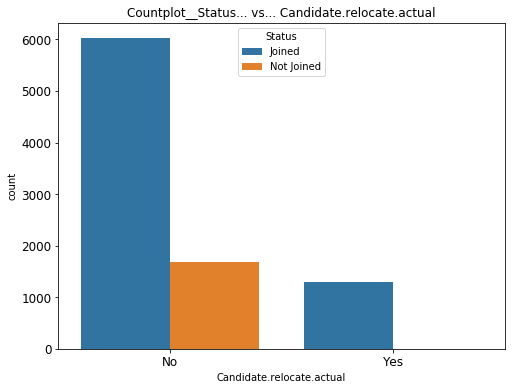

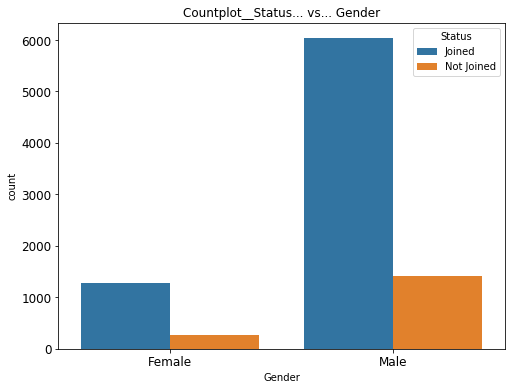

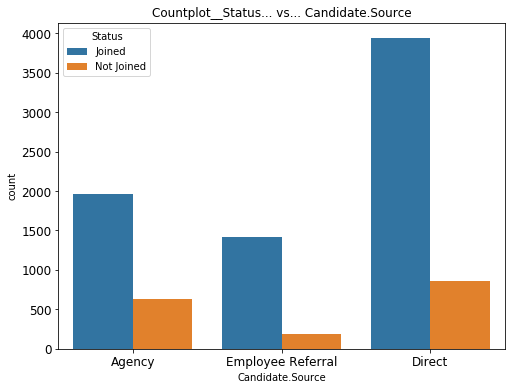

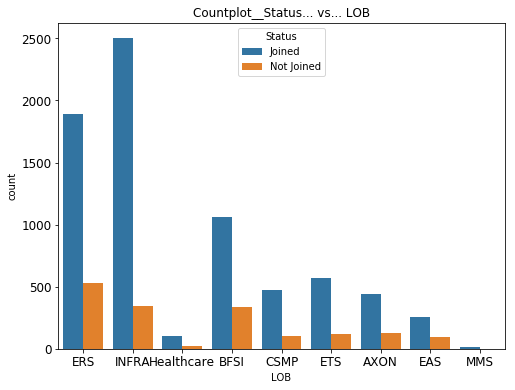

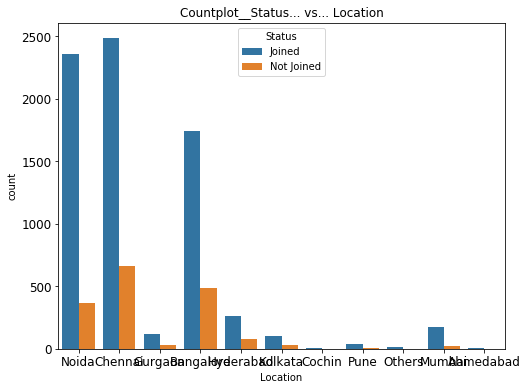

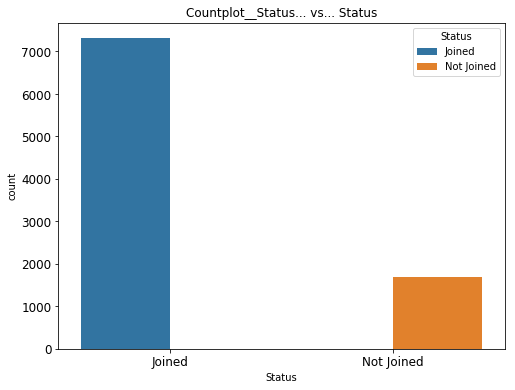

In [273]:
for column in df_category:
    plt.figure(figsize = (8,6))
    plt.subplot(1,1,1)
    plt.title(f'Countplot__Status... vs... {column}')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    sns.countplot(column, hue= 'Status', data = df_category)

# Check Correlation

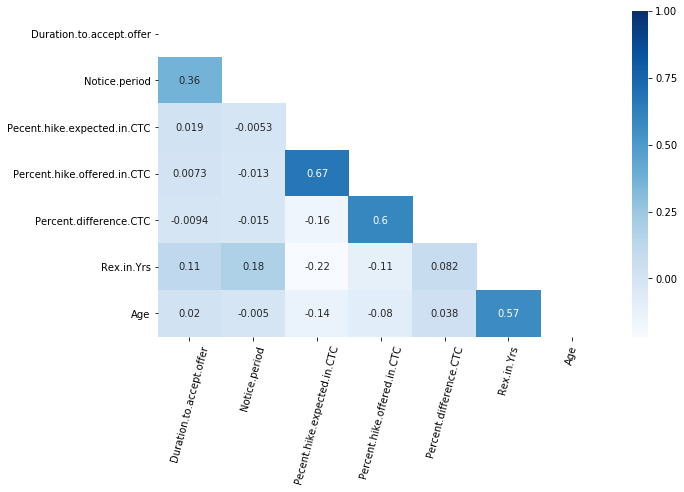

In [274]:
corr = df.corr()
plt.figure(figsize=(10,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, annot = True, cmap = 'Blues', mask = mask)
plt.xticks(rotation=75)
plt.show()


In [275]:
data = pd.get_dummies(df,drop_first = True)

In [276]:
data.head(1)

Duration.to.accept.offer  Notice.period  Pecent.hike.expected.in.CTC  \
0                        14             30                       -20.79   

   Percent.hike.offered.in.CTC  Percent.difference.CTC  Rex.in.Yrs  Age  \
0                        13.16                   42.86           7   34   

   DOJ.Extended_Yes  Offered.band_E1  Offered.band_E2  ...  Location_Chennai  \
0                 1                0                1  ...                 0   

   Location_Cochin  Location_Gurgaon  Location_Hyderabad  Location_Kolkata  \
0                0                 0                   0                 0   

   Location_Mumbai  Location_Noida  Location_Others  Location_Pune  \
0                0               1                0              0   

   Status_Not Joined  
0                  0  

[1 rows x 35 columns]

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
#splitting the data into independent and dependent
np.random.seed(1001)
x = data.iloc[:,:-1]    #independent variable
y = data.iloc[:,-1]     #dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [279]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7196, 34), (1799, 34), (7196,), (1799,))

### Build Logistic Regression

In [280]:
from sklearn.linear_model import LogisticRegression

In [281]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [282]:
import innomatics

In [283]:
y_pred=model.predict(x_test)

In [284]:
y_pred_prob=model.predict_proba(x_test)[:,1]#considering 1 probability

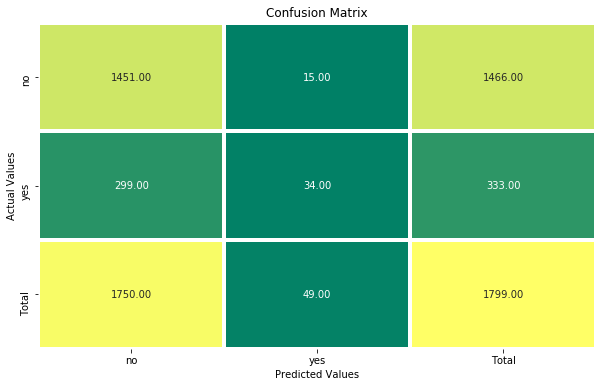

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1466
           1       0.69      0.10      0.18       333

    accuracy                           0.83      1799
   macro avg       0.76      0.55      0.54      1799
weighted avg       0.80      0.83      0.77      1799


************************************Kappa Score************************************


Kappa Score = 0.13703054153477623

******************************Area Under Curve Score******************************


AUC Score = 0.5459350892502324
Number of probabilities to build ROC = 480


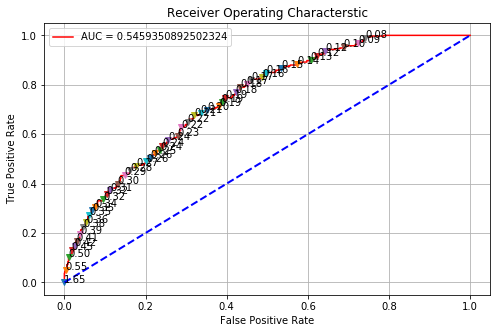

In [285]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=10,verbose=True)

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
data.shape

(8995, 35)

In [179]:
vif=pd.DataFrame()
vif['features']=data.columns
vif['VIF Score']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

In [180]:
vif

features  VIF Score
0             Duration.to.accept.offer   2.252285
1                        Notice.period   5.246602
2          Pecent.hike.expected.in.CTC  52.904071
3          Percent.hike.offered.in.CTC  57.031590
4               Percent.difference.CTC  14.334525
5                           Rex.in.Yrs  11.572725
6                                  Age  82.398168
7                     DOJ.Extended_Yes   2.296925
8                      Offered.band_E1  31.739646
9                      Offered.band_E2  18.268069
10                     Offered.band_E3   5.285318
11                   Joining.Bonus_Yes   1.129714
12       Candidate.relocate.actual_Yes   1.286366
13                         Gender_Male   6.091396
14             Candidate.Source_Direct   3.168235
15  Candidate.Source_Employee Referral   1.778663
16                            LOB_BFSI   4.168049
17                            LOB_CSMP   2.135929
18                             LOB_EAS   1.745850
19                             LOB_ERS   6.234334
20                             LOB_ETS   2.343785
21                      LOB_Healthcare   1.257116
22                           LOB_INFRA   7.865311
23                             LOB_MMS   1.037654
24                  Location_Bangalore  32.277250
25                    Location_Chennai  45.509037
26                     Location_Cochin   1.129748
27                    Location_Gurgaon   3.104981
28                  Location_Hyderabad   5.741639
29                    Location_Kolkata   2.689512
30                     Location_Mumbai   4.020655
31                      Location_Noida  38.379112
32                     Location_Others   1.214239
33                       Location_Pune   1.711525
34                   Status_Not Joined   1.364717

In [181]:
vif

features  VIF Score
0             Duration.to.accept.offer   2.252285
1                        Notice.period   5.246602
2          Pecent.hike.expected.in.CTC  52.904071
3          Percent.hike.offered.in.CTC  57.031590
4               Percent.difference.CTC  14.334525
5                           Rex.in.Yrs  11.572725
6                                  Age  82.398168
7                     DOJ.Extended_Yes   2.296925
8                      Offered.band_E1  31.739646
9                      Offered.band_E2  18.268069
10                     Offered.band_E3   5.285318
11                   Joining.Bonus_Yes   1.129714
12       Candidate.relocate.actual_Yes   1.286366
13                         Gender_Male   6.091396
14             Candidate.Source_Direct   3.168235
15  Candidate.Source_Employee Referral   1.778663
16                            LOB_BFSI   4.168049
17                            LOB_CSMP   2.135929
18                             LOB_EAS   1.745850
19                             LOB_ERS   6.234334
20                             LOB_ETS   2.343785
21                      LOB_Healthcare   1.257116
22                           LOB_INFRA   7.865311
23                             LOB_MMS   1.037654
24                  Location_Bangalore  32.277250
25                    Location_Chennai  45.509037
26                     Location_Cochin   1.129748
27                    Location_Gurgaon   3.104981
28                  Location_Hyderabad   5.741639
29                    Location_Kolkata   2.689512
30                     Location_Mumbai   4.020655
31                      Location_Noida  38.379112
32                     Location_Others   1.214239
33                       Location_Pune   1.711525
34                   Status_Not Joined   1.364717

In [182]:
import statsmodels.api as sm

In [183]:
for i in range(len(x.keys())):
    model = sm.GLM(y,x).fit()
    print(model.summary(),'\n\n\n')
    if model.pvalues.sort_values(ascending = False)[0]>0.025:
        x.drop(columns = model.pvalues.sort_values(ascending = False).index[0], axis = 1, inplace = True)
    else:
        break

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Status_Not Joined   No. Observations:                 8995
Model:                            GLM   Df Residuals:                     8968
Model Family:                Gaussian   Df Model:                           26
Link Function:               identity   Scale:                         0.13761
Method:                          IRLS   Log-Likelihood:                -3829.7
Date:                Wed, 23 Oct 2019   Deviance:                       1234.1
Time:                        22:17:39   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Notice.period                          0.0030      0.000     16.212      0.000     

In [184]:
#spliting into training and testing
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#30% data to test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6296, 27), (2699, 27), (6296,), (2699,))

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
model=LogisticRegression()   

In [187]:
model.fit(x_train,y_train) # train the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred_train=model.predict_proba(x_train)
y_pred_train

## These are Probabilites values for NOT JOINED and JOINED

array([[0.99679206, 0.00320794],
       [0.99684742, 0.00315258],
       [0.7629944 , 0.2370056 ],
       ...,
       [0.79957128, 0.20042872],
       [0.99610996, 0.00389004],
       [0.92536368, 0.07463632]])

In [189]:
y_pred_train_1=y_pred_train[:,1]
y_pred_train_1 #not_joined

array([0.00320794, 0.00315258, 0.2370056 , ..., 0.20042872, 0.00389004,
       0.07463632])

In [190]:
from sklearn.metrics import log_loss
class threshold():
    def _init_(self):
        self.th = 0.5   # threshold value
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [191]:
y_pred_train_prob_1 = y_pred_train_1
probabilites = np.linspace(0,1,100)
pre = threshold()
mle = []
for p in probabilites:
    pre.th = p
    yy = pd.Series(y_pred_train_prob_1)
    y_pred_0_5= yy.apply(pre.predict_threshold) #predict_threshold is funtion see above Class
    loss = log_loss(y_train,y_pred_0_5)
    mle.append(loss)

thereshold probabilty value= 0.5656565656565657


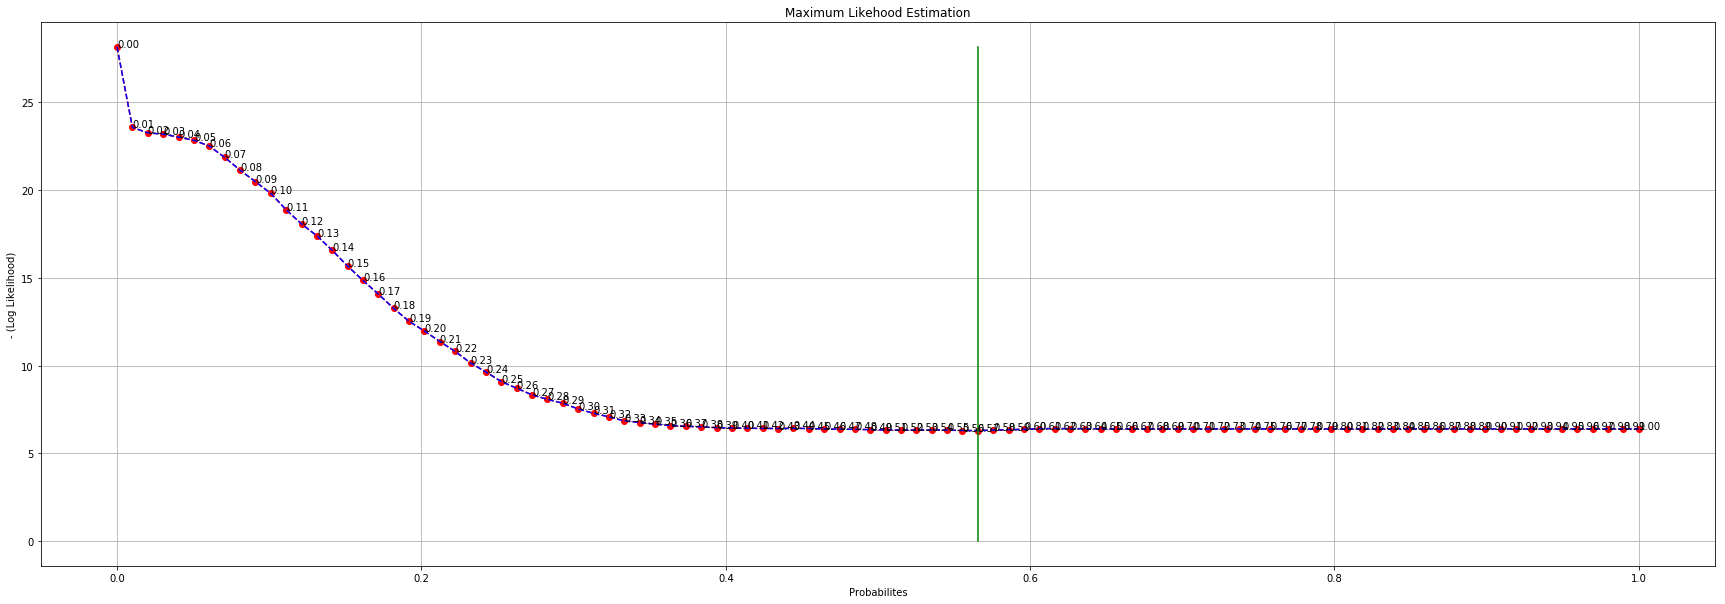

In [192]:
# Visualize
plt.figure(figsize = (30,10))
plt.plot(probabilites, mle,'ro--')
plt.plot(probabilites, mle, 'b--')
ind = np.array(mle).argmin()
mx = max(mle)
val = probabilites[ind]


print('thereshold probabilty value=', val)
plt.plot([val,val],[0,mx],'g')

for i,p in enumerate(probabilites):
    plt.text(probabilites[i], mle[i],'%0.2f'%(p))



plt.xlabel('Probabilites')
plt.ylabel('- (Log Likelihood)')
plt.title('Maximum Likehood Estimation')
plt.grid()
plt.show()

In [193]:
y_pred=model.predict(x_test)

### Predict Test Data values

In [194]:
y_pred_prob=model.predict_proba(x_test)[:,1] 

In [195]:
y_pred_prob

array([0.36977765, 0.24157021, 0.47380629, ..., 0.45427976, 0.23189785,
       0.23116563])

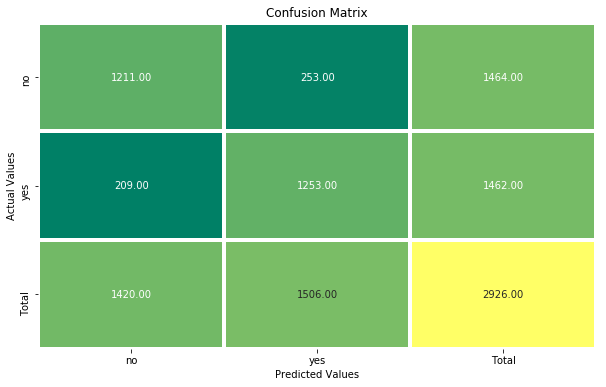

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1464
           1       0.83      0.86      0.84      1462

    accuracy                           0.84      2926
   macro avg       0.84      0.84      0.84      2926
weighted avg       0.84      0.84      0.84      2926


************************************Kappa Score************************************


Kappa Score = 0.6842168703969143

******************************Area Under Curve Score******************************


AUC Score = 0.8421154679942888
Number of probabilities to build ROC = 10


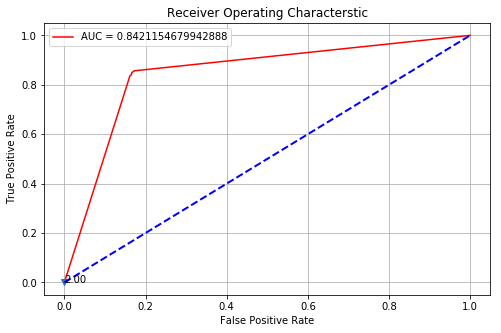

In [258]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=10,verbose=True)

In [197]:
import imblearn
from imblearn.over_sampling import SMOTE

In [198]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(x,y)

In [199]:
#saving array's
np.savez('hr_oversample.npz',x_resample,y_resample)

1    7313
0    7313
dtype: int64

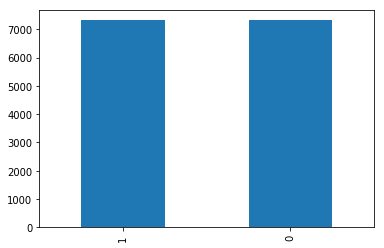

In [200]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts()

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2)  # 20 is testdata
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 27), (2926, 27), (11700,), (2926,))

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
model_over=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [204]:
model_over.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [205]:
y_pred=model_over.predict(x_test)
y_pred_prob=model_over.predict_proba(x_test)[:,1]

In [206]:
y_pred_prob

array([1. , 0.6, 0. , ..., 0. , 0.2, 1. ])

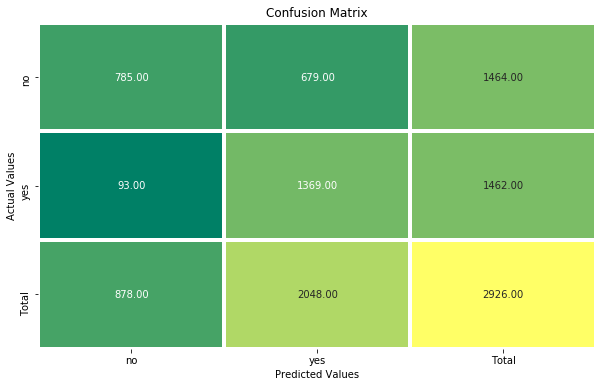

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.89      0.54      0.67      1464
           1       0.67      0.94      0.78      1462

    accuracy                           0.74      2926
   macro avg       0.78      0.74      0.73      2926
weighted avg       0.78      0.74      0.73      2926


************************************Kappa Score************************************


Kappa Score = 0.4724613419998748

******************************Area Under Curve Score******************************


AUC Score = 0.7362953473421393
Number of probabilities to build ROC = 7


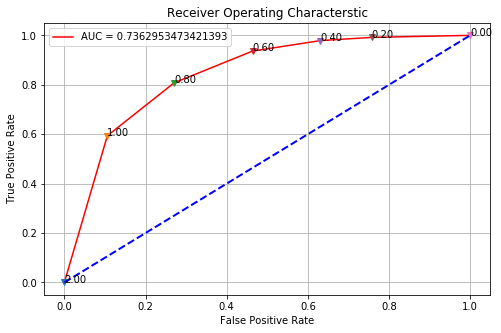

In [207]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

### Note
**Cost of predicting “Not Joining” as “Joining” (FPs) cases is 3 times more than predicting “Joining” as “Not Joining” (FNs)**

In [208]:
from sklearn.metrics import classification_report,confusion_matrix

In [209]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 785  679]
 [  93 1369]]


In [210]:
y_pred_prob_test=model.predict_proba(x_test)
y_pred_prob_test_1=y_pred_prob_test[:,1]

In [211]:
pre=innomatics.threshold()#predictor class
threh_prob=0.25# from ROC curve
pre.th=threh_prob#setting threshold
yy=pd.Series(y_pred_prob_test_1)#converting prob array into series
y_pred_class_test=yy.apply(pre.predict_threshold)#apply predictor class

In [212]:
cm=confusion_matrix(y_test,y_pred_class_test)
cm

array([[1136,  328],
       [ 664,  798]], dtype=int64)

Text(51.0, 0.5, 'True values')

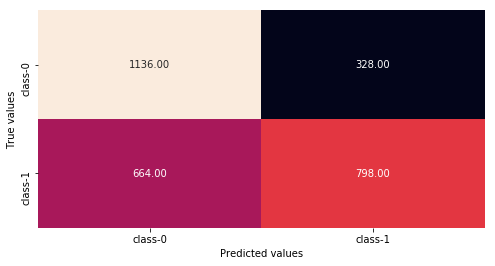

In [213]:
cm=confusion_matrix(y_test,y_pred_class_test)
plt.figure(figsize=(8,4))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [214]:
cr=classification_report(y_test,y_pred_class_test)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1464
           1       0.71      0.55      0.62      1462

    accuracy                           0.66      2926
   macro avg       0.67      0.66      0.66      2926
weighted avg       0.67      0.66      0.66      2926



In [215]:
from sklearn.tree import DecisionTreeClassifier # Classifictaion Tree
from sklearn.tree import export_graphviz  # For visualization Tree

In [216]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = None) # gini is entrophy purupose

In [217]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [218]:
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [219]:
y_pred = model.predict(x_test)
#------------ confusion matricx----------

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)

#------------Classification report-----

cr = classification_report(y_test,y_pred)
print(cr)
print('-'*20)

#------------------cohen_kappa_score---------

kappa_score = cohen_kappa_score(y_test,y_pred)
print('Kappa Score =', kappa_score)
print('-'*20)

#----------------roc_auc_score---------
auc_score = roc_auc_score(y_test,y_pred)
print('AUC Score = ', auc_score)

[[1211  253]
 [ 209 1253]]
--------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1464
           1       0.83      0.86      0.84      1462

    accuracy                           0.84      2926
   macro avg       0.84      0.84      0.84      2926
weighted avg       0.84      0.84      0.84      2926

--------------------
Kappa Score = 0.6842168703969143
--------------------
AUC Score =  0.8421154679942888


In [220]:
y_prob_pred=model.predict_proba(x_test)
y_prob=y_prob_pred[:,1]
y_prob_pred

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [221]:
#y_test[y_test == 2] =0
#y_pred[y_pred == 2] =0

In [222]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)

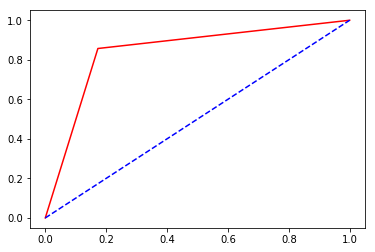

In [223]:
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.show()

In [224]:
y_pred_prob=model.predict_proba(x_test)[:,1]

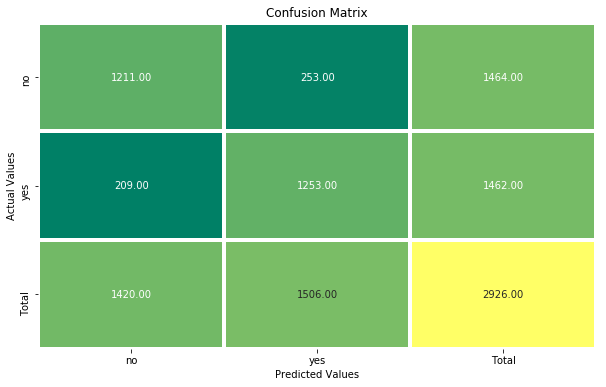

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1464
           1       0.83      0.86      0.84      1462

    accuracy                           0.84      2926
   macro avg       0.84      0.84      0.84      2926
weighted avg       0.84      0.84      0.84      2926


************************************Kappa Score************************************


Kappa Score = 0.6842168703969143

******************************Area Under Curve Score******************************


AUC Score = 0.8421154679942888
Number of probabilities to build ROC = 10


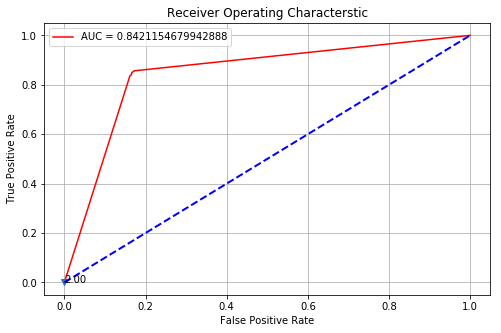

In [225]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=10,verbose=True)

- **pydotplus is used for visualization especially for Tree**
- **graphviz is used for exporting graphs and visualized**

In [226]:
import pydotplus
import math

In [227]:
# convert numpay array into Panadas
convert = pd.DataFrame(x_train, columns = x.columns)

In [228]:
export_graphviz(model, out_file = 'credit.odt',
               feature_names = convert.columns,
               filled = True)

In [229]:
graph = pydotplus.graph_from_dot_file('credit.odt')

In [230]:
graph.write_pdf('credit_tree.pdf')

True

In [231]:
graph.write_jpg('credit_tree.jpg')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.343733 to fit



True

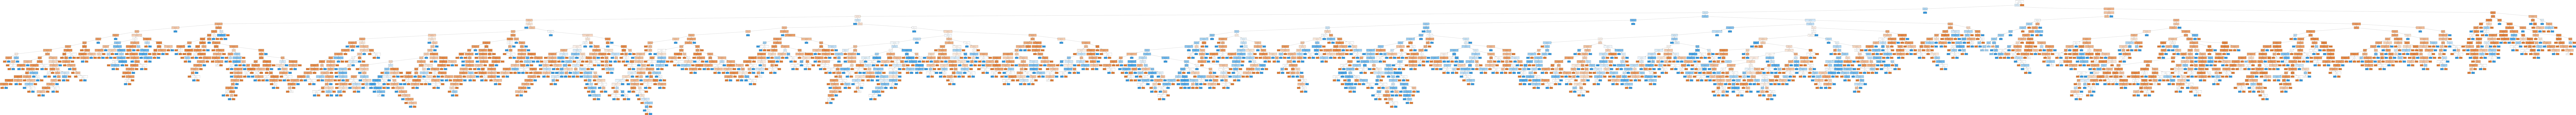

In [232]:
from IPython.display import Image
Image('credit_tree.jpg')

# GridSearch CV (cv----> Cross validation)
- its a tunning method
- Hyperparameter tunning --->we dont know which method is good 
- GridSearch is used for more models, i.e svm and all algorithms we will use

In [233]:
from sklearn.model_selection import GridSearchCV #gridsearch cross  valiadation
# hyperparametre tunning

In [234]:
model_tune = DecisionTreeClassifier()

In [235]:
tunned_parameter = [{'criterion':['gini','entropy'],
                    'max_depth':range(2,10)}]

In [236]:
clf = GridSearchCV(model_tune, param_grid= tunned_parameter, cv=10, scoring = 'roc_auc')  # cross validation(splits) = 10
clf.fit(x_train,y_train)

# cv ----> spliting the data into 10 parts and each part contaions 70

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [237]:
clf.best_score_

0.902691186731064

In [238]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [239]:
model_new=DecisionTreeClassifier(criterion='gini',max_depth=9)

In [240]:
model_new.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [241]:
y_pred_1=model_new.predict(x_test)
y_pred_1

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [242]:
# convert numpay array into Panadas
convert_new = pd.DataFrame(x_train, columns = x.columns)

In [243]:
export_graphviz(model_new,out_file='HR__.odt',feature_names=convert_new.columns,filled=True)

In [244]:
graph_new=pydotplus.graph_from_dot_file('HR__.odt')

In [245]:
graph_new.write_jpg('HR_new__tree.jpg')

True

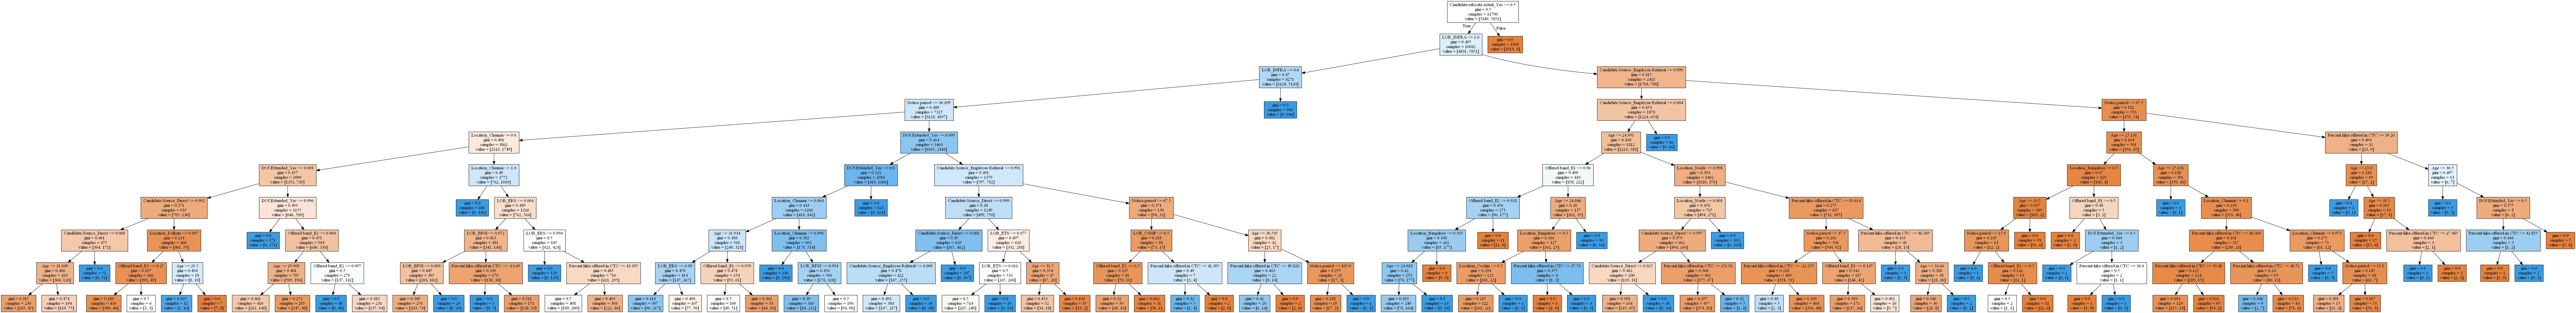

In [246]:
from IPython.display import Image
Image("HR_new__tree.jpg")

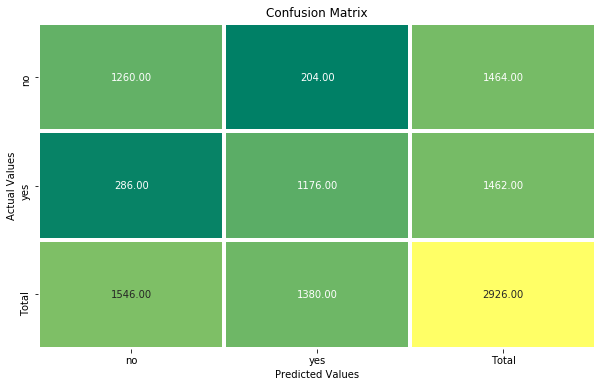

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1464
           1       0.85      0.80      0.83      1462

    accuracy                           0.83      2926
   macro avg       0.83      0.83      0.83      2926
weighted avg       0.83      0.83      0.83      2926


************************************Kappa Score************************************


Kappa Score = 0.6650587818637322

******************************Area Under Curve Score******************************


AUC Score = 0.8325166513421991
Number of probabilities to build ROC = 10


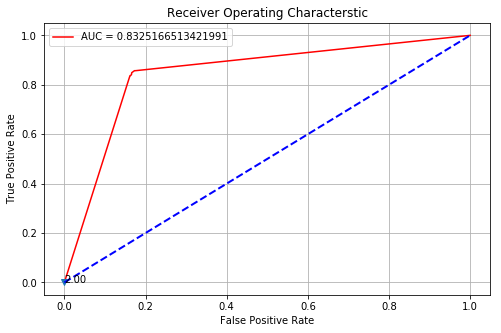

In [247]:
innomatics.classification_metric(y_test,y_pred_1,y_pred_prob,['no','yes'],n=50,verbose=True)


In [248]:
from sklearn.ensemble import GradientBoostingClassifier

In [249]:
model_grad = GradientBoostingClassifier(n_estimators=500, max_depth= 10)

In [250]:
model_grad.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [251]:
y_predict=model_grad.predict(x_test)
y_probab=model_grad.predict_proba(x_test)

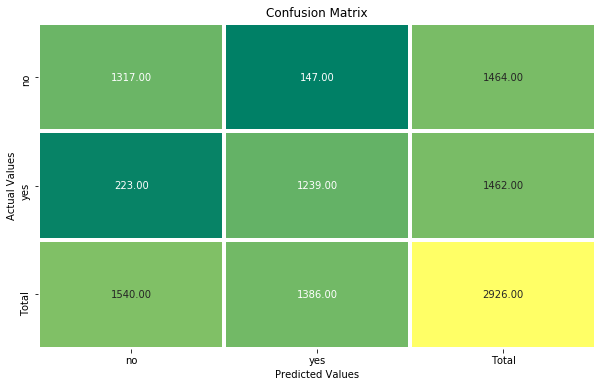

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1464
           1       0.89      0.85      0.87      1462

    accuracy                           0.87      2926
   macro avg       0.87      0.87      0.87      2926
weighted avg       0.87      0.87      0.87      2926


************************************Kappa Score************************************


Kappa Score = 0.7470859116419628

******************************Area Under Curve Score******************************


AUC Score = 0.873529692090332
Number of probabilities to build ROC = 527


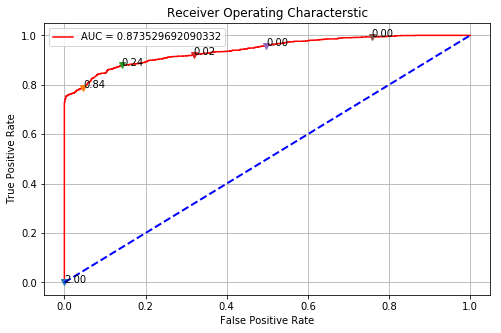

In [252]:
innomatics.classification_metric(y_test,y_predict,y_probab[:,1],['no','yes'],n=100,verbose=True)